## Problem Statement
This is a credit history of the customers from a financial institution. The agenda is to predict possible credit defaulters upfront and help the financial institutions take steps accordingly.

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read and import file
df = pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Inspection

In [3]:
# shape of data
df.shape

(614, 13)

In [4]:
# columns of the data
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [5]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
# check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

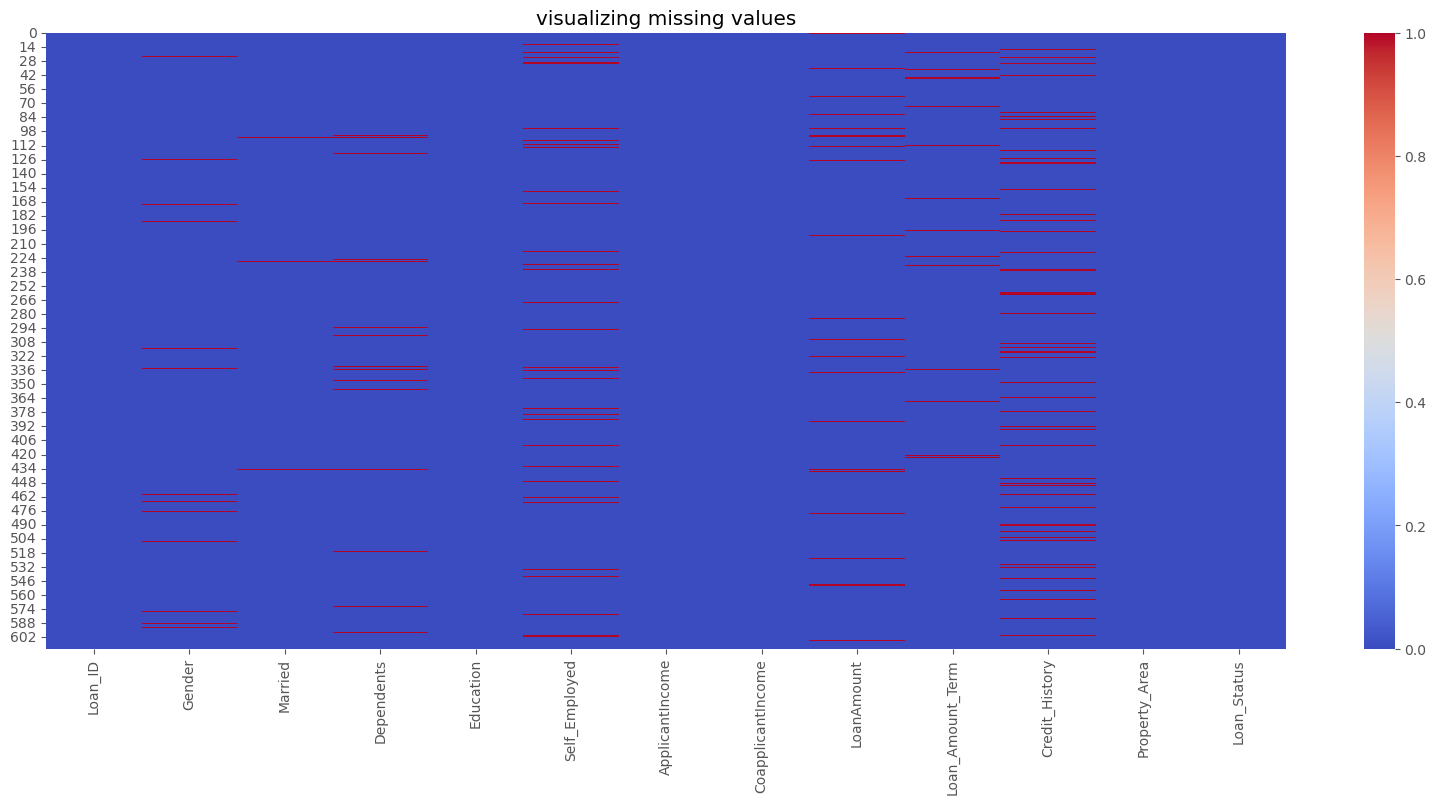

In [8]:
# visualize the missing values
plt.figure(figsize = (20, 8))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

In [9]:
# # pattern of missingness
# import missingno as msno
# msno.bar(df)
# plt.show()

In [10]:
# summary statistics of the data
df.describe().astype('int')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614,614,592,600,564
mean,5403,1621,146,342,0
std,6109,2926,85,65,0
min,150,0,9,12,0
25%,2877,0,100,360,1
50%,3812,1188,128,360,1
75%,5795,2297,168,360,1
max,81000,41667,700,480,1


The mean applicant income is $5403, with a standard deviation of $6109. This indicates that there is quite a wide range of income levels among the applicants. The minimum applicant income is $150, while the maximum income is $81000.

On average, the co-applicant income is $1621, with a standard deviation of $2926. The minimum co-applicant income is $0, meaning that some applicants do not have a co-applicant. The maximum co-applicant income is $41667.

The loan amount has a mean value of $146, with a standard deviation of $85. The minimum loan amount is $9, while the maximum loan amount is $700. This suggests that there is variability in the loan amounts requested by the applicants.

The loan amount term has an average value of 342 months, with a standard deviation of 65 months. The minimum loan amount term is 12 months, while the maximum term is 480 months. This indicates that there is a range of loan terms available to the applicants.

Lastly, the credit history variable is binary, with a value of 1 indicating a good credit history and 0 indicating a bad credit history. The dataset has 564 non-null values for this variable, suggesting that there are some missing values.

Overall, this dataset provides insights into the financial profiles of loan applicants, including their income levels, loan amounts, loan terms, and credit histories. Further analysis and modeling could be performed to explore relationships between these variables and the likelihood of loan approval.

In [11]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()

print(num_vars_negative)

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


ApplicantIncome      50
CoapplicantIncome    18
LoanAmount           39
Loan_Amount_Term     88
Credit_History       89
dtype: int64


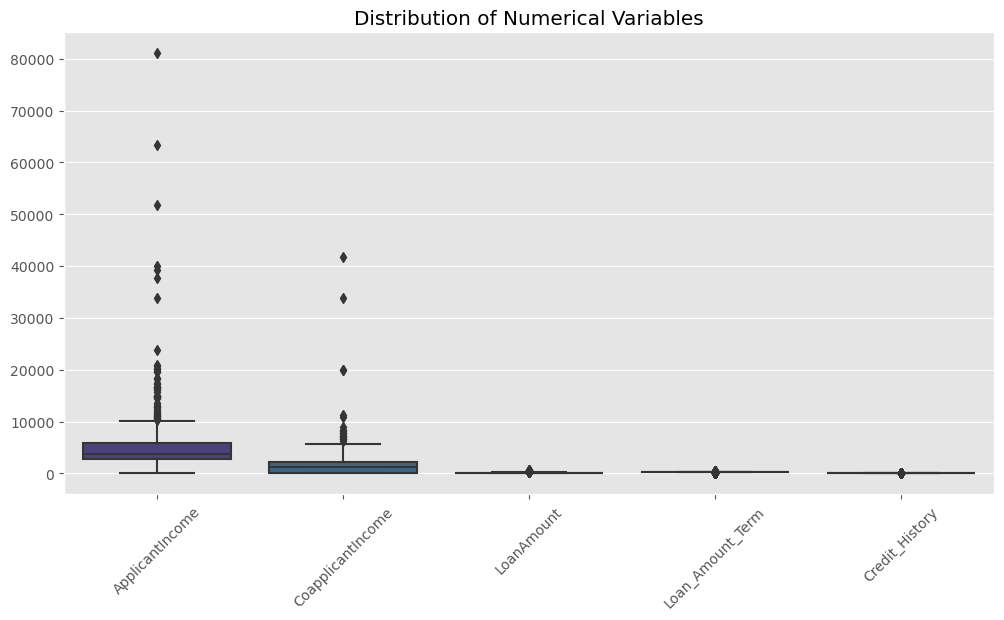

In [12]:
# Extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of outliers for each numerical variable
outliers_count = ((num_vars < num_vars.quantile(0.25) - 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))) |
                  (num_vars > num_vars.quantile(0.75) + 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# Create a boxplot to show the distribution of each numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

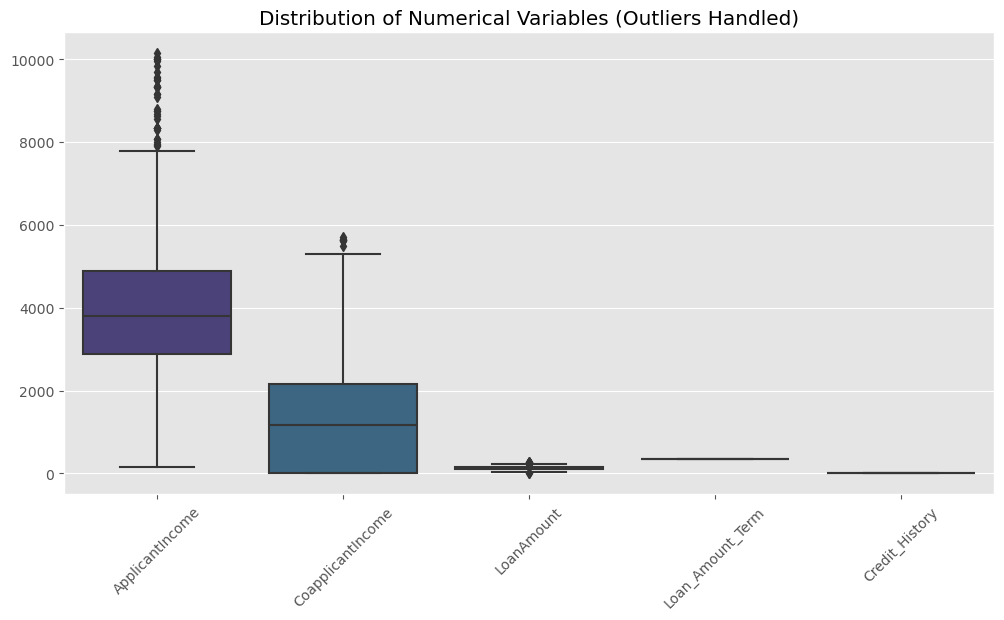

In [13]:
# Calculate the median of each numerical variable
medians = num_vars.median()

# Replace outliers with the median of each variable
for column in num_vars.columns:
    q1 = num_vars[column].quantile(0.25)
    q3 = num_vars[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_vars[column] = num_vars[column].apply(lambda x: medians[column] if x < lower_bound or x > upper_bound else x)

# Create a boxplot to show the distribution of each numerical variable after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables (Outliers Handled)')
plt.xticks(rotation=45)
plt.show()


*The outliers in the numerical variables has been removed by replacing it with the median of the columns.*

# Data Validation 

In [14]:
# select the numerical variables
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df[column].value_counts())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0         NaN             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0             360.0   
610           4106.0                0.0        40.0             360.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4            

In [15]:
# select the categorical variables
cat_vars = df.select_dtypes(include=['category', 'object'])
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df[column].value_counts())

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3      

In [16]:
# Handling of missing values in the dataset
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

In [17]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [18]:
# confirm if there are missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis
We will be analyzing the distribution of individual features and visualizing them.

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
cat_vars.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

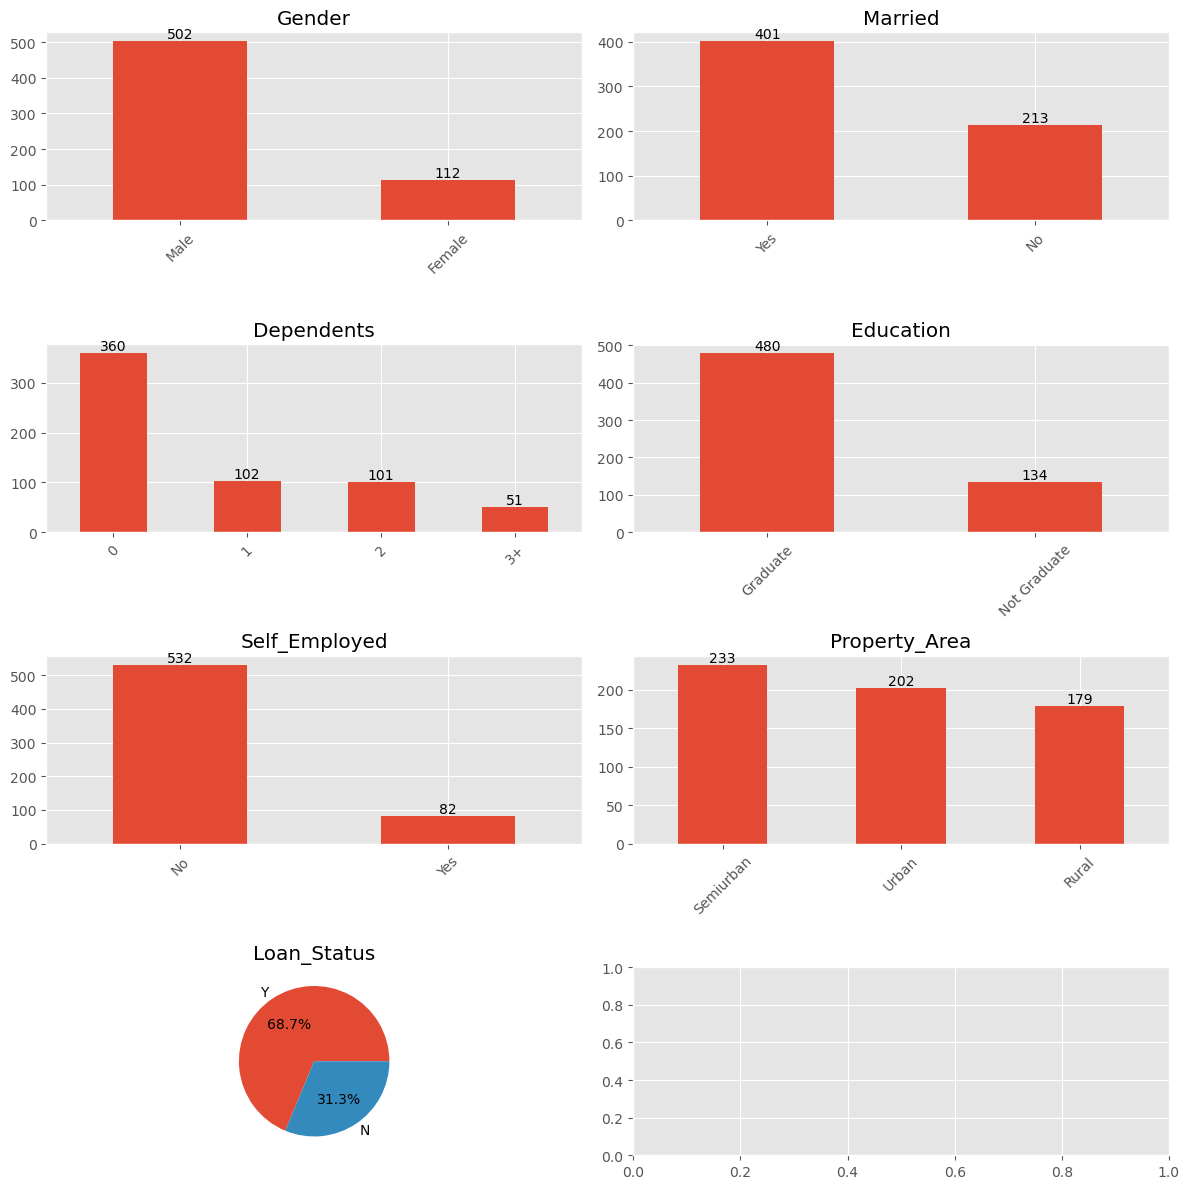

In [21]:
# Create a figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Iterate through the columns and plot the charts
for i, col in enumerate(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']):
    row = i // 2  # Determine the row index
    col_index = i % 2   # Determine the column index using a different variable name

    # Plot a bar chart for categorical columns
    if col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
        counts = df[col].value_counts()
        counts.plot(kind='bar', ax=axes[row, col_index])
        axes[row, col_index].set_title(col)
        axes[row, col_index].set_xlabel('')
        
        # Add data labels
        for index, value in enumerate(counts):
            axes[row, col_index].text(index, value, str(value), ha='center', va='bottom')

        # Rotate x-axis labels
        axes[row, col_index].tick_params(axis='x', rotation=45)

    # Plot a pie chart for Loan_Status column
    else:
        counts = df[col].value_counts()
        counts.plot(kind='pie', ax=axes[row, col_index], autopct='%1.1f%%')
        axes[row, col_index].set_title(col)
        axes[row, col_index].set_ylabel('')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


*The chart shows that there are 502 males and 112 females in the dataset. Among them, 401 are married and 213 are not. In terms of dependents, 360 have no dependents, 102 have one dependent, 101 have two dependents, and 51 have three or more dependents.The majority (480) of individuals are graduates, while 134 are not. Most of the individuals (532) are not self-employed, while only 82 are. The majority of individuals (233) reside in semi-urban areas, while 202 reside in urban areas and 179 reside in rural areas. Finally, the loan status shows that 68.7% of individuals have a loan, while 31.3% do not.*

In [22]:
num_vars.columns.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

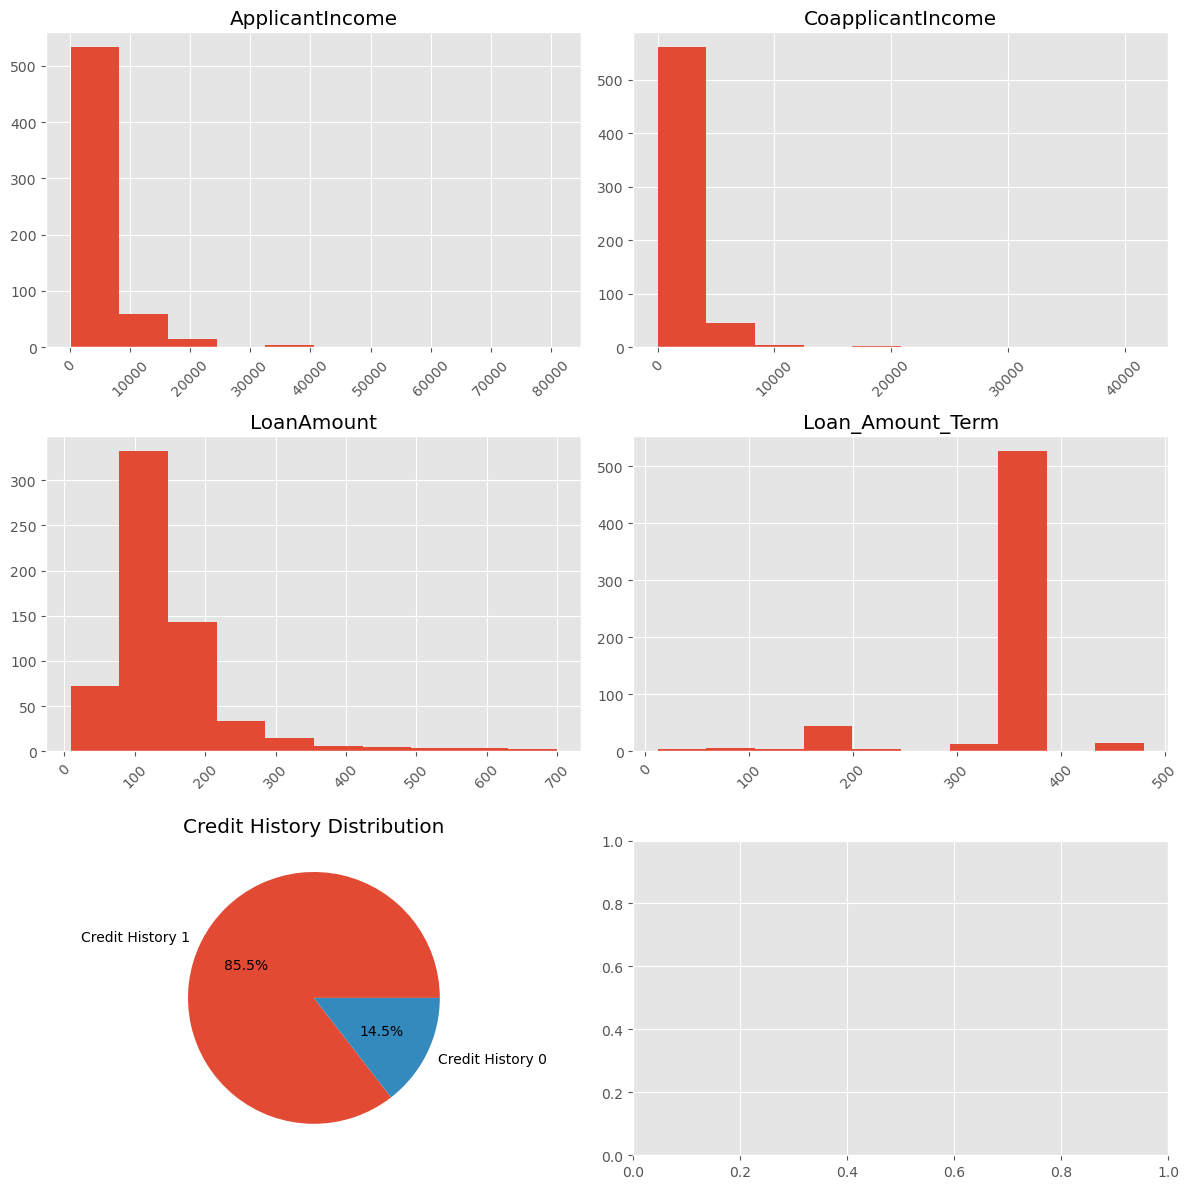

In [23]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Iterate through the columns and plot the charts
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']):
    row = i // 2  # Determine the row index
    col_index = i % 2   # Determine the column index using a different variable name

    # Plot a histogram for numerical columns
    counts = df[col].value_counts()
    axes[row, col_index].hist(df[col])
    axes[row, col_index].set_title(col)
    axes[row, col_index].set_xlabel('')
        
    # Rotate x-axis labels
    axes[row, col_index].tick_params(axis='x', rotation=45)

# Plot a pie chart for Credit_History column in its own subplot
credit_history_counts = df['Credit_History'].value_counts()
axes[2, 0].pie(credit_history_counts, labels=['Credit History 1', 'Credit History 0'], autopct='%1.1f%%')
axes[2, 0].set_title('Credit History Distribution')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

## Bivariate Analysis
We will be analyzing the relationship between two variables and visualizing them. This can help us understand how variables are related to each other and identify potential patterns or trends in the data. For example, we might analyze the relationship between Loan_Id and LoanAmount, or Gender and Credit History. 

In [24]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [25]:
# customer loan_id and loan amount
cust_loan_amount = df.groupby('Loan_ID')['LoanAmount'].sum().sort_values(ascending = False)[:10]
cust_loan_amount

Loan_ID
LP001585    700.0
LP001469    650.0
LP002813    600.0
LP001536    600.0
LP002191    570.0
LP002547    500.0
LP002959    496.0
LP001610    495.0
LP002101    490.0
LP002693    480.0
Name: LoanAmount, dtype: float64

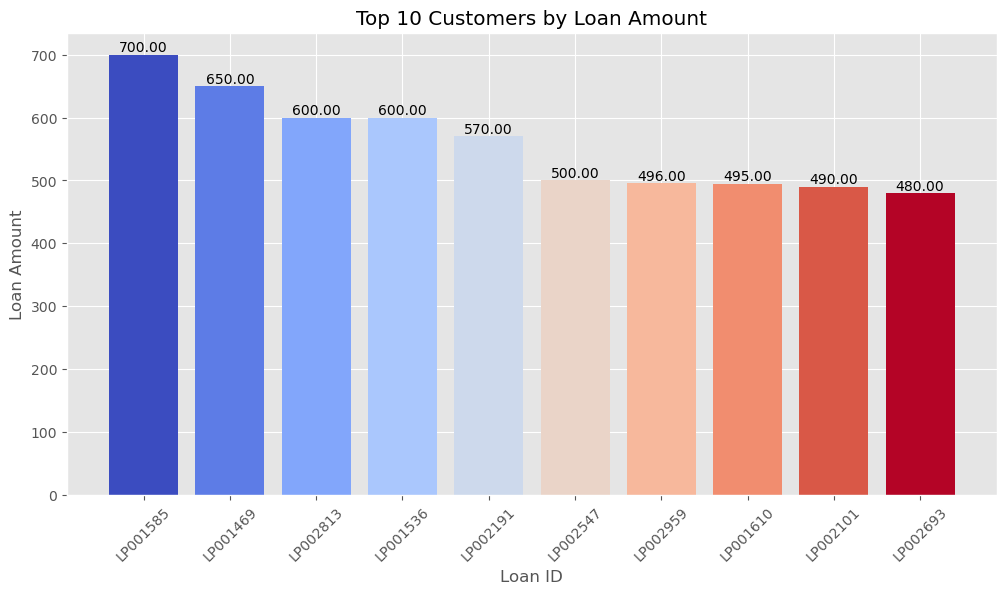

In [26]:
# Group by Loan_ID and calculate the sum of LoanAmount for each customer
cust_loan_amount = df.groupby('Loan_ID')['LoanAmount'].sum().sort_values(ascending=False)[:10]

# Create a color gradient for the bars
colors = plt.cm.coolwarm(np.linspace(0, 1, len(cust_loan_amount)))

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(cust_loan_amount.index, cust_loan_amount.values, color=colors)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom')

# Customize the chart
plt.xticks(rotation=45)
plt.xlabel('Loan ID')
plt.ylabel('Loan Amount')
plt.title('Top 10 Customers by Loan Amount')

# Show the plot
plt.show()


In [27]:
# customer loan_id and applicant income
cust_loan_income = df.groupby('Loan_ID')['ApplicantIncome'].sum().sort_values(ascending = False)[:10]
cust_loan_income

Loan_ID
LP002317    81000
LP002101    63337
LP001585    51763
LP001536    39999
LP001640    39147
LP002422    37719
LP001637    33846
LP001448    23803
LP002624    20833
LP001922    20667
Name: ApplicantIncome, dtype: int64

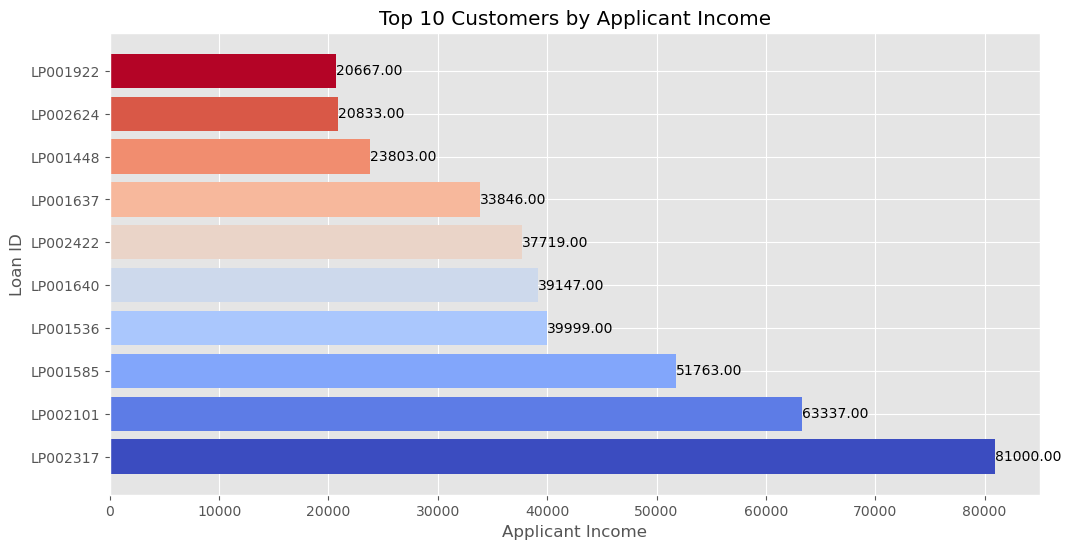

In [28]:
# Group by Loan_ID and calculate the sum of ApplicantIncome for each customer
cust_loan_income = df.groupby('Loan_ID')['ApplicantIncome'].sum().sort_values(ascending=False)[:10]

# Create a color gradient for the bars
colors = plt.cm.coolwarm(np.linspace(0, 1, len(cust_loan_income)))

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(cust_loan_income.index, cust_loan_income.values, color=colors)

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', ha='left', va='center')

# Customize the chart
plt.xlabel('Applicant Income')
plt.ylabel('Loan ID')
plt.title('Top 10 Customers by Applicant Income')

# Show the plot
plt.show()


In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
# Gender and Loan Status 
gender_loan_status = df.groupby('Gender')['Loan_Status'].value_counts().unstack('Loan_Status')
gender_loan_status

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


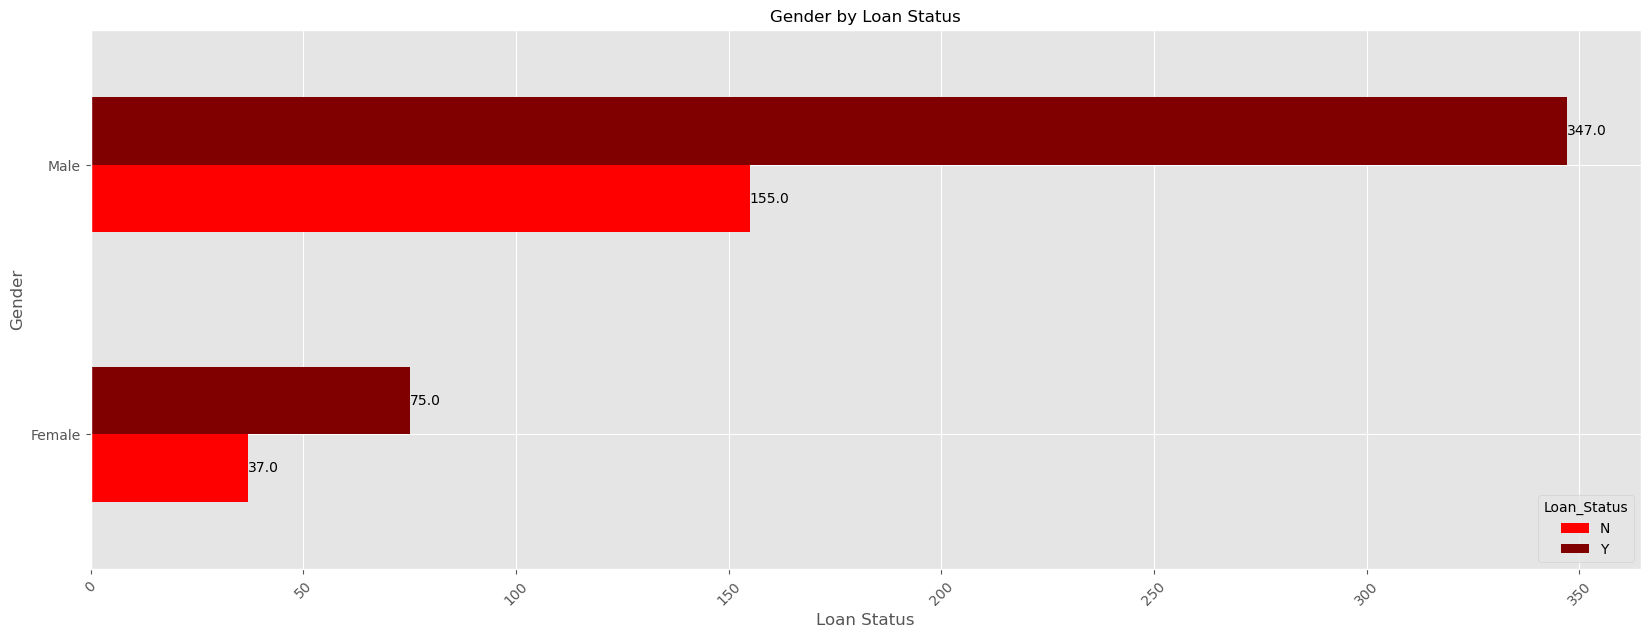

In [31]:
# plot a pivot table
colors = ['#FF0000', '#800000']
ax = gender_loan_status.plot.barh(figsize = (20, 7), color = colors)
plt.ticklabel_format(style ='plain', axis = 'x')
# Set the title and labels
plt.title('Gender by Loan Status', fontsize = 12)
plt.xlabel('Loan Status')
plt.ylabel('Gender')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.1f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

*It's observed that there is a gender bias in loan approvals. Specifically, 347 males were approved for loans while only 75 females were approved. However, it's worth noting that more males were also denied loans, with a total of 155 loan disapprovals compared to 37 for females*

In [32]:
# Marital Status and Loan Status
marital_loan_status = df.groupby('Married')['Loan_Status'].value_counts().unstack('Loan_Status')
marital_loan_status

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


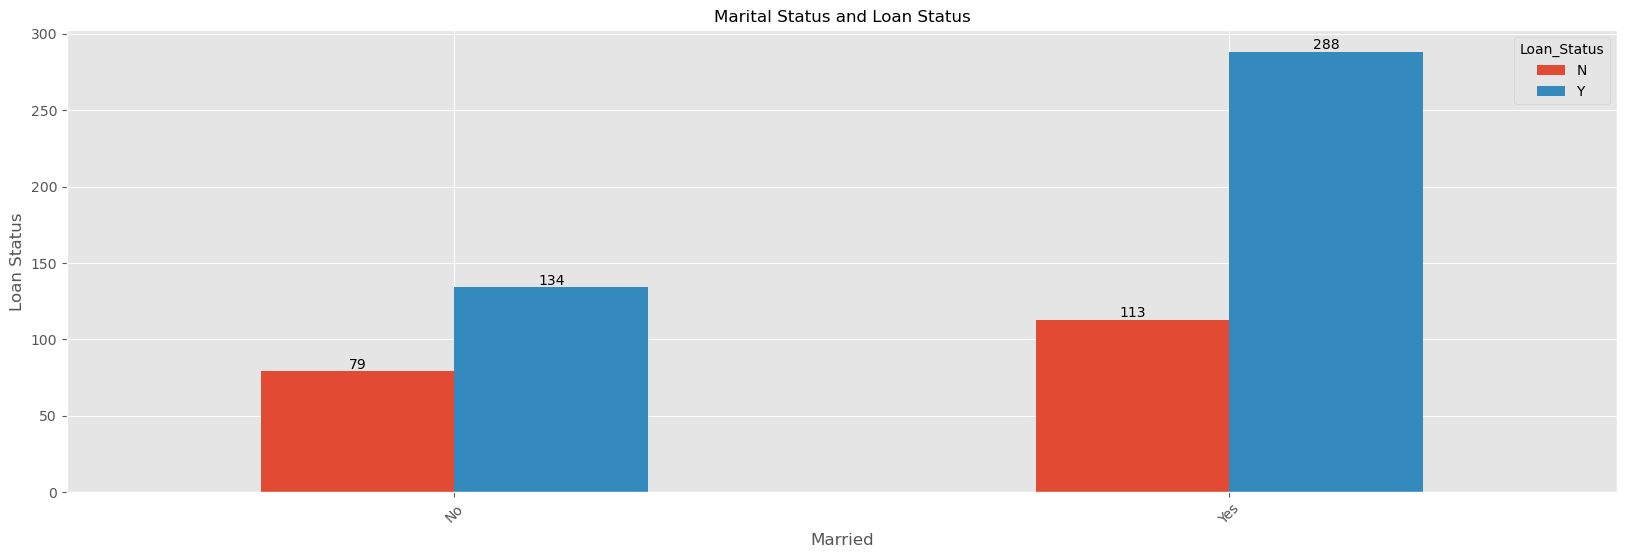

In [33]:
# plot a pivot table
colors = ['#FF0000', '#800000']
ax = marital_loan_status.plot.bar(figsize = (20, 6))
plt.ticklabel_format(style ='plain', axis = 'y')
# Set the title and labels
plt.title('Marital Status and Loan Status', fontsize = 12)
plt.ylabel('Loan Status')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

*It's observed a disparity in loan approval rates between married and unmarried individuals. Specifically, out of the total applicants, 288 married individuals had their loans approved, while only 134 unmarried individuals had their loans approved. However, it's important to note that there were also cases where loans were not approved. Among the married applicants, 113 had their loans disapproved, whereas 79 unmarried applicants faced loan disapproval.*

In [34]:
num_vars.columns.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

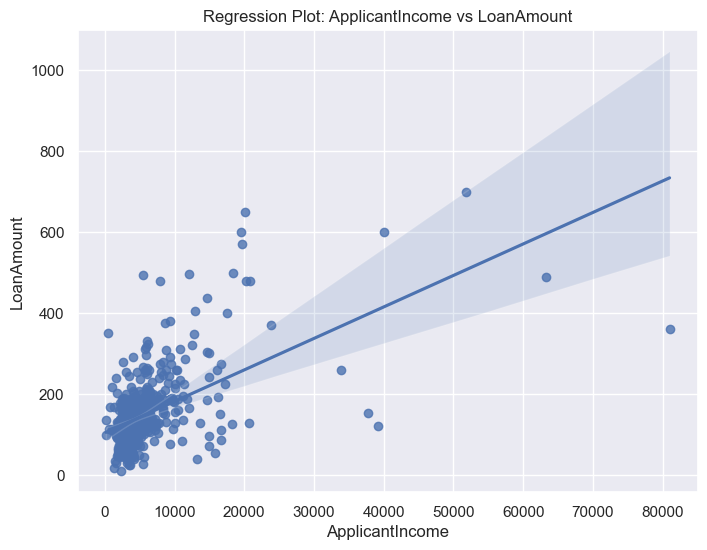

In [35]:
# Select the variables for the regplot
x_var = 'ApplicantIncome'
y_var = 'LoanAmount'

# Create a customized regplot using seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x=x_var, y=y_var)
plt.title(f'Regression Plot: {x_var} vs {y_var}')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()


## Multivariate Analysis

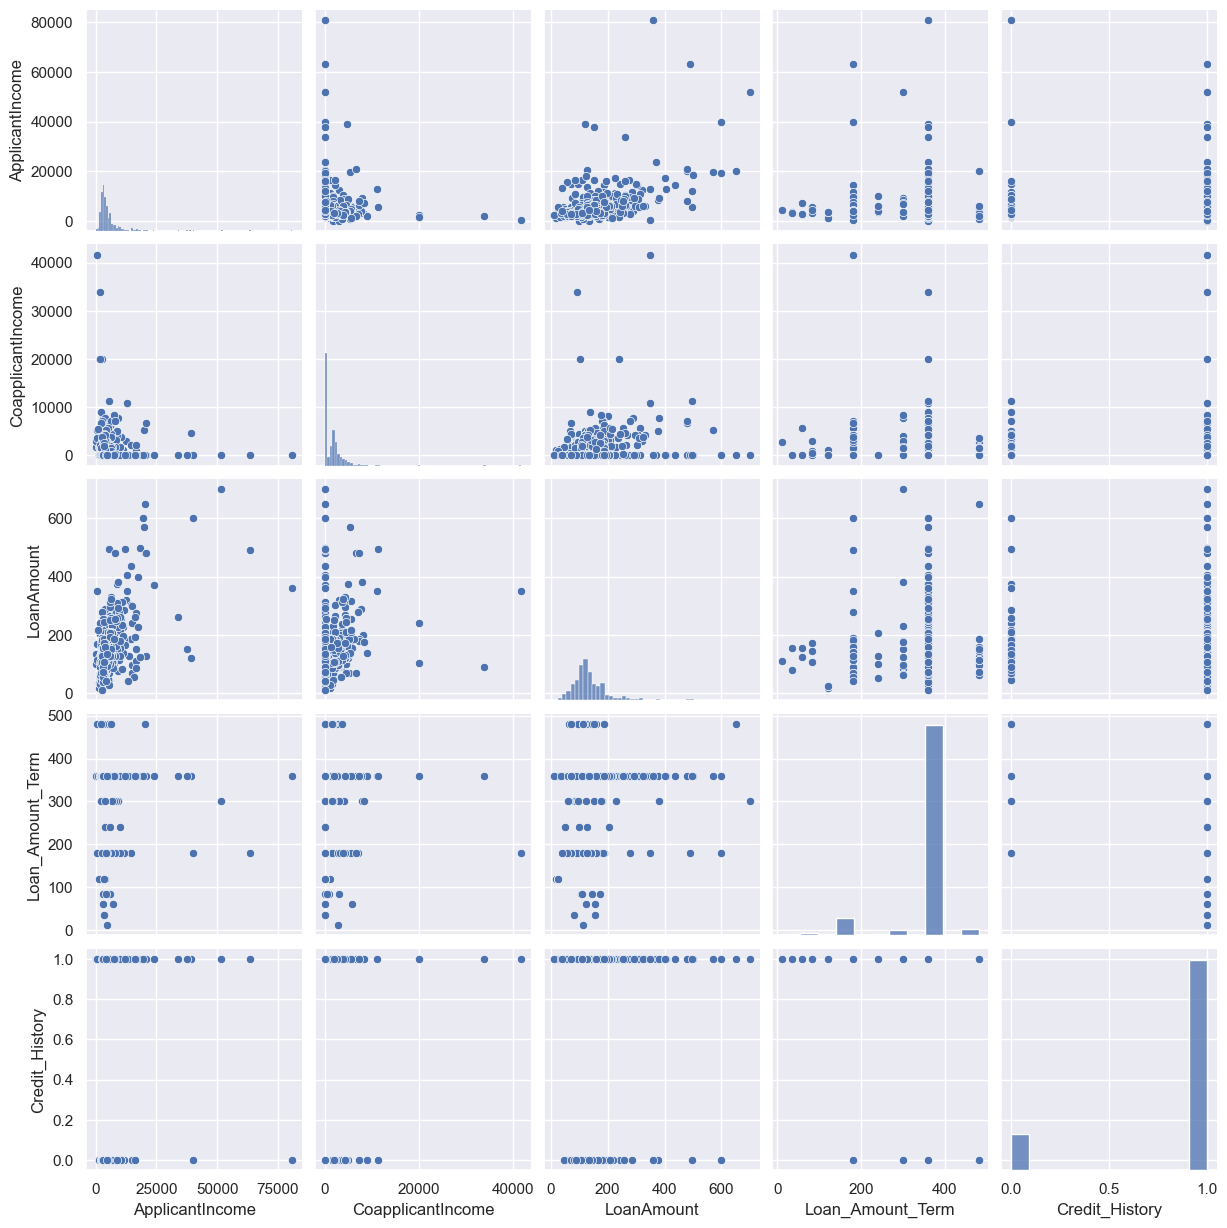

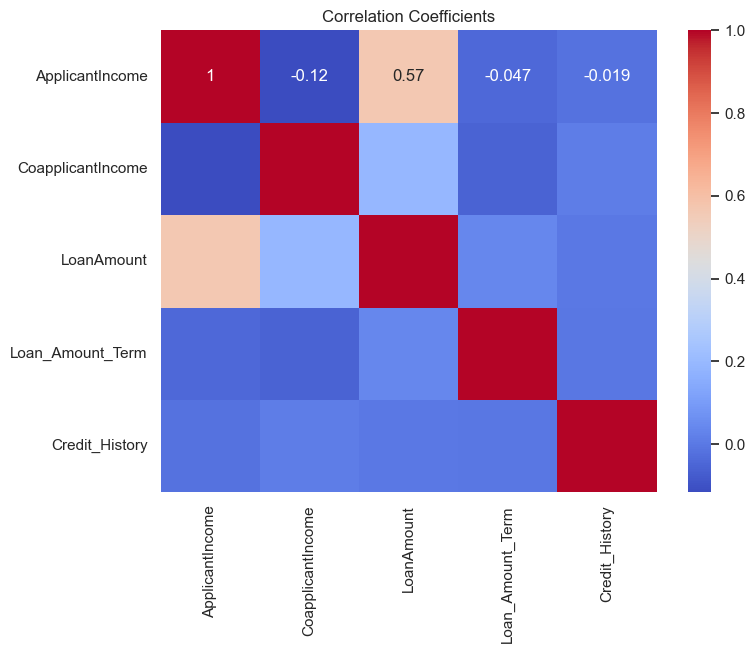

In [36]:
# Select the numerical variables
numerical_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create a scatterplot matrix using Seaborn
sns.pairplot(df[numerical_vars])

# Calculate the correlation coefficients
correlation_matrix = df[numerical_vars].corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Coefficients')
plt.show()


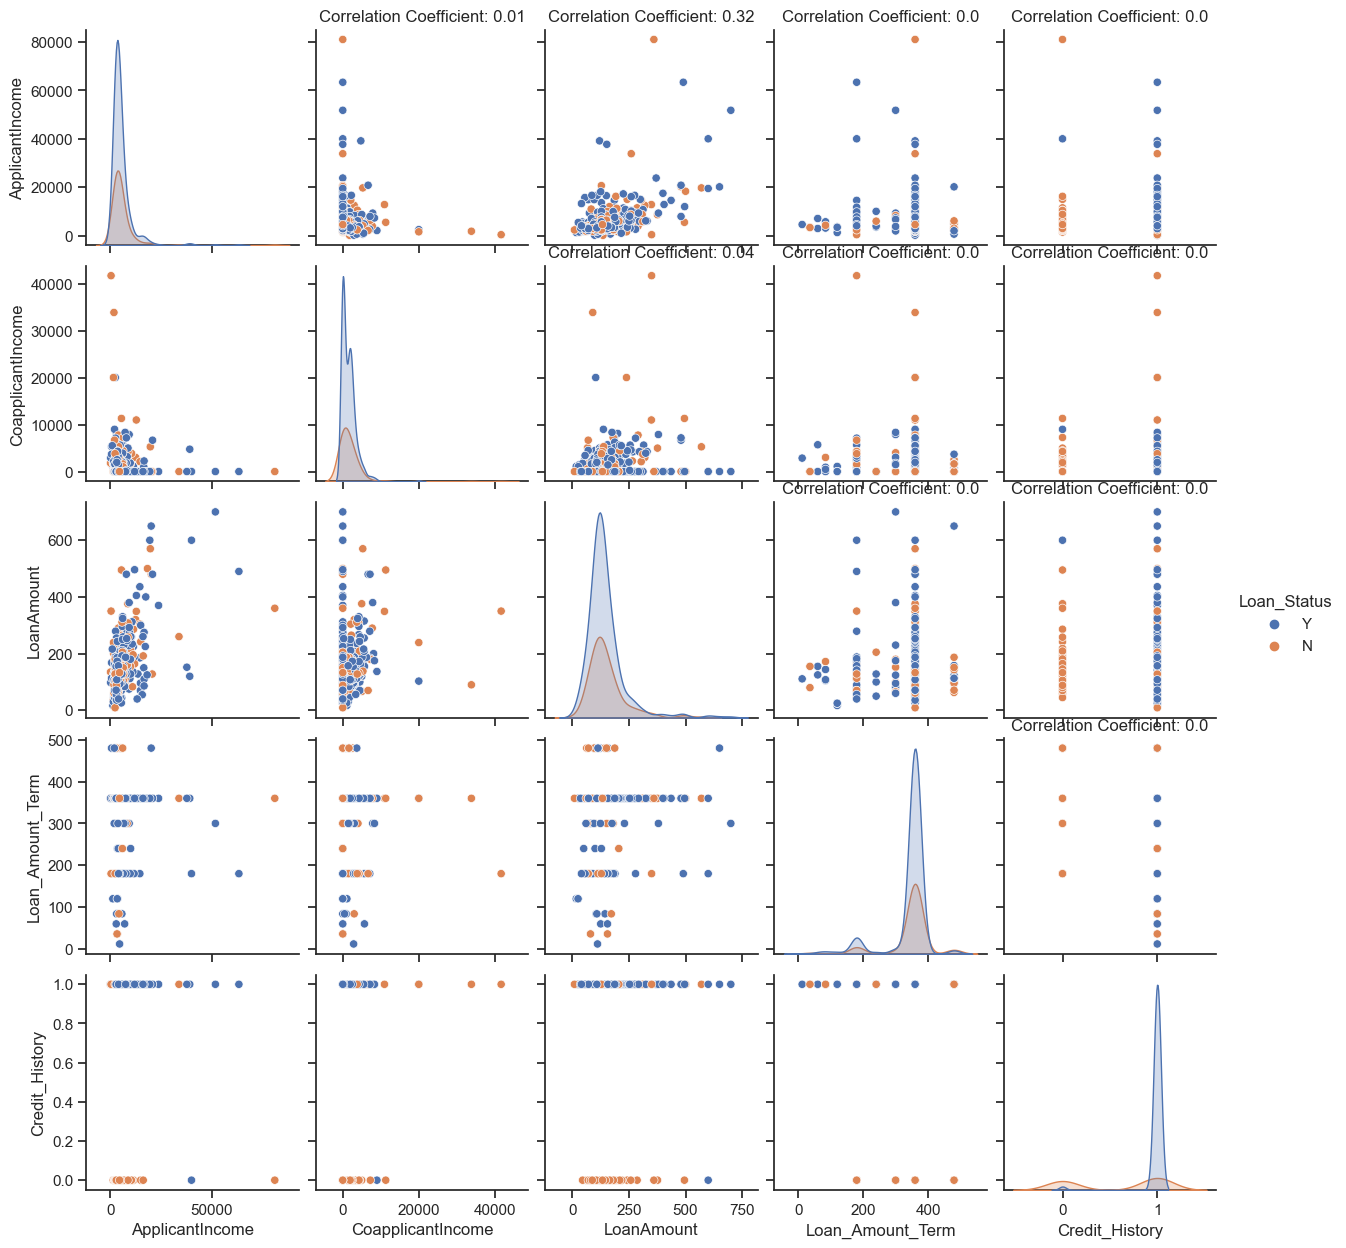

In [37]:
# Select the numerical variables
numerical_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create a pairplot with hue='LoanStatus'
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=numerical_vars, hue='Loan_Status')

# Add correlation coefficients to the title of each subplot
for i, j in zip(*plt.np.triu_indices_from(g.axes, 1)):
    r = plt.np.corrcoef(df[numerical_vars[i]], df[numerical_vars[j]])
    if r.ndim == 2: #Check if r is a 2D matrix
        r_squared = round(float(r[0,1] ** 2), 2)
    else: # Assume r is a 1D array
        r_squared = round(float(r ** 2), 2)
    g.axes[i, j].set_title(f'Correlation Coefficient: {r_squared}')

plt.show()


In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
df['Credit_History'].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [40]:
# categorize 'Credit_History' into category
def cred_hist(x):
    if x == 1:
        return 'High credit score'
    else:
        return 'Low credit score'

df['Credit_History'] = df['Credit_History'].apply(cred_hist)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,High credit score,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,High credit score,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,High credit score,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,High credit score,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,High credit score,Urban,Y


# Convert Categorical Columns to Numerical
- One Hot Encoding
- Label Encoder

In [41]:
cat_vars.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [42]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0               0              2            1  
1               0              0            0  
2       

## Feature Selection

In [43]:
# drop the loan_id
df.drop('Loan_ID', axis=1, inplace=True)

In [44]:
# Select the target variable y
y = df['Loan_Status']

# Drop the target variable and create the independent variables
X = df.drop('Loan_Status', axis=1)


In [45]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [46]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,0,2


In [47]:
# value count of the target y
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

# Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)
*SMOTE is a technique used to balance imbalanced datasets(target), where one class is significantly smaller than the other. It creates synthetic samples by creating new instances that are similar to the minority class. This helps prevent overfitting, which is a problem that can occur when using other techniques like ROS(Random Over Sampling).*


In [48]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({1: 422, 0: 192})
Class distribution after resampling: Counter({1: 422, 0: 422})


# Train-Test-Split
Split the dataset into training and testing sets. We will allocate a certain percentage of 80-20 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.


In [50]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
468       0        1           2          1              0              210   
786       0        0           1          0              0             5327   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
468             2917.0   98.000000        360.000000               0   
786                0.0  116.682961        415.550109               0   

     Property_Area  
468              1  
786              2  

      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
493       0        0           0          1              1            17263   
215       1        1           3          1              0             3850   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
493                0.0       225.0             360.0               0   
215              983.0       100.0             360.0               0   

     Property_Area  
49

In [51]:
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (675, 11)
The X_test shape: (169, 11)
The y_train shape: (675,)
The y_test shape: (169,)


# Scaling of Data
Data scaling is a pre-processing step in machine learning that is used to standardize the range of independent variables or features of a dataset. It is important because many machine learning models assume that all features are on the same scale. If the features are not on the same scale, certain models may be biased towards features with larger values.

There are many methods for scaling data in Python, including:

1. Min-max scaling: This method scales the data to a fixed range, usually between 0 and 1. It can be implemented using the `MinMaxScaler` class from the `sklearn.preprocessing` module.

2. Standardization: This method scales the data to have a mean of 0 and a standard deviation of 1. It can be implemented using the `StandardScaler` class from the `sklearn.preprocessing` module.

3. Robust scaling: This method scales the data based on the median and interquartile range, making it more robust to outliers. It can be implemented using the `RobustScaler` class from the `sklearn.preprocessing` module.

4. Normalization: This method scales each data point to have a length of 1, which can be useful for certain distance-based algorithms. It can be implemented using the `Normalizer` class from the `sklearn.preprocessing` module.

These methods can be applied to both numerical and categorical features, depending on the specific use case.

## MinMax Scaler 



In [52]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection
The following algortihms for the model selection include:
- Logistic Regression
- Decision Tree
- Support Vector Machine
- K-Nearest Neighbor


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

# Model Training
- Import the necessary libraries for each algorithms
- create an instance of each model
- fit the models to the training data using the fit method

### Logistic Regression

In [54]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [55]:
from sklearn.metrics import accuracy_score
# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the logistic regression is 68.0 %


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.6804733727810651,
 'Precision': 0.6129032258064516,
 'Recall': 0.76,
 'F1-Score': 0.6785714285714285}

#### Decision Tree

In [57]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [58]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
print(f'The accuracy of the DecisionTree is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the DecisionTree is 75.1 %


In [59]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.7514792899408284,
 'Precision': 0.7037037037037037,
 'Recall': 0.76,
 'F1-Score': 0.7307692307692308}

#### Support Vector Machine

In [60]:
# Create an instance of Support vector machine
svm_model = SVC(probability=True)

# Fit the model on the scaled training
svm_model.fit(X_train_scaled, y_train)
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

In [61]:
# Predict the classes of the testing data
y_pred = svm_model.predict(X_test_scaled)

# print accuracy score for SVM
print(f'The accuracy of the SVM is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the SVM is 67.5 %


In [62]:
svm_result = metrics_calculator(y_test, y_pred, 'svm_model')
svm_result

{'Model': 'svm_model',
 'Accuracy': 0.6745562130177515,
 'Precision': 0.6041666666666666,
 'Recall': 0.7733333333333333,
 'F1-Score': 0.6783625730994152}

#### K-Nearest Neighbour 

In [63]:
# Create an instance of K-Nearest Neighbour
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

In [64]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test_scaled)

# print accuracy score for K-Nearest Neigbour
print(f'The accuracy of the KNN is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the KNN is 64.5 %


In [65]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.6449704142011834,
 'Precision': 0.5842696629213483,
 'Recall': 0.6933333333333334,
 'F1-Score': 0.6341463414634146}

## Model Evaluation
Evaluate the models using classification reports and confusion matrices.

In [66]:
# from sklearn.metrics import classification_report, plot_confusion_matrix

# # Assuming you have your models (lr_model, dt_model, rf_model, svm_model, knn_model, xgb_model) and data loaded

# # Create a list of model names
# model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']
# models = [lr_model, dt_model, svm_model, knn_model]

# # Set the labels
# labels = ['Not-Loan Defaulted', 'Loan Defaulted']

# # Set the desired number of decimal places
# decimal_places = 3

# # Loop through each model and generate a classification report and confusion matrix
# for i, model in enumerate(models):
#     # Predict the classes of the testing data
#     y_pred = model.predict(X_test_scaled)
    
#     # Generate the classification report with 3 decimal places
#     report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
#     print(f'{model_names[i]} Classification Report:\n{report}')
    
#     # Plot the confusion matrix
#     plot_confusion_matrix(model, X_test_scaled, y_test, display_labels=labels)
#     plt.title(f'{model_names[i]} Confusion Matrix')
#     plt.show()


Logistic Regression Classification Report:
                    precision    recall  f1-score   support

Not-Loan Defaulted      0.763     0.617     0.682        94
    Loan Defaulted      0.613     0.760     0.679        75

          accuracy                          0.680       169
         macro avg      0.688     0.689     0.680       169
      weighted avg      0.696     0.680     0.681       169



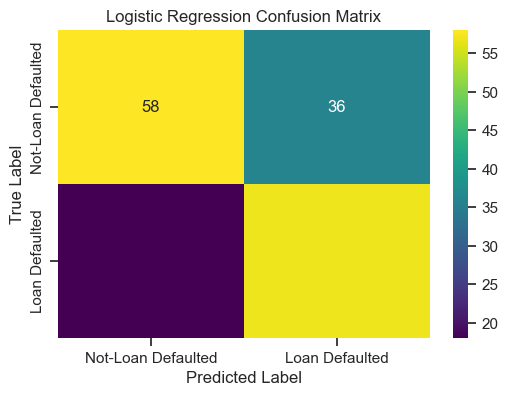

Decision Tree Classification Report:
                    precision    recall  f1-score   support

Not-Loan Defaulted      0.795     0.745     0.769        94
    Loan Defaulted      0.704     0.760     0.731        75

          accuracy                          0.751       169
         macro avg      0.750     0.752     0.750       169
      weighted avg      0.755     0.751     0.752       169



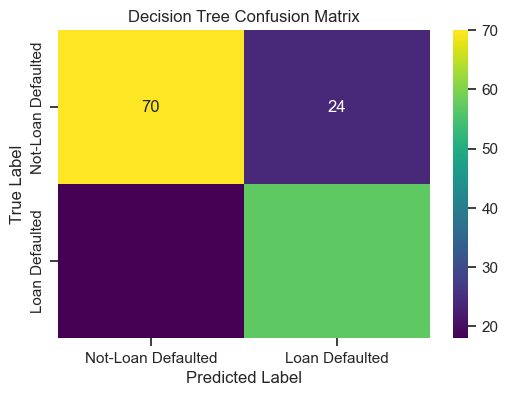

SVM Classification Report:
                    precision    recall  f1-score   support

Not-Loan Defaulted      0.767     0.596     0.671        94
    Loan Defaulted      0.604     0.773     0.678        75

          accuracy                          0.675       169
         macro avg      0.686     0.685     0.675       169
      weighted avg      0.695     0.675     0.674       169



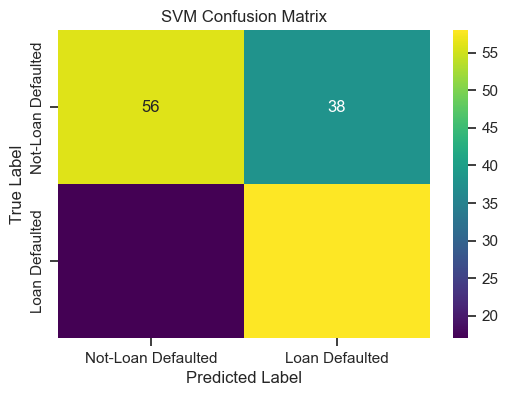

KNN Classification Report:
                    precision    recall  f1-score   support

Not-Loan Defaulted      0.713     0.606     0.655        94
    Loan Defaulted      0.584     0.693     0.634        75

          accuracy                          0.645       169
         macro avg      0.648     0.650     0.645       169
      weighted avg      0.656     0.645     0.646       169



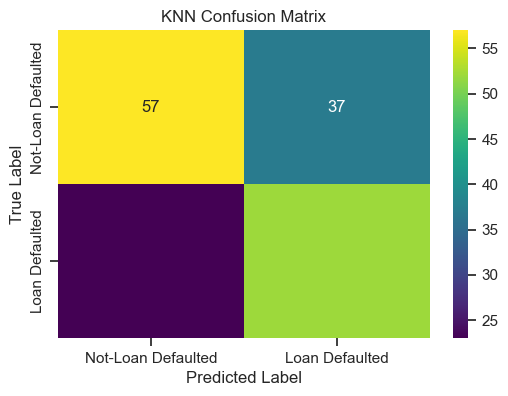

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a list of models and their corresponding names
models = [lr_model, dt_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']

# Set the labels
labels = ['Not-Loan Defaulted', 'Loan Defaulted']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with the specified number of decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_name} Classification Report:\n{report}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

*The predicting the outcome of loan status, where 1 represents loan defaulted and 0 represent not loan defaulted. We want to pay attention to precision and recall, as well as the f1-score of the loan defaulted class.*

Precision(positive prediction value): It measures the positive predictions made by the model. In this context of loan defaulted prediction, it represent the percentage of predicted loan defaulted cases that are aactual loan defaulted. High precision is important because you want to minimize false positives.

Hence, from the confusion of the models, we discover that the Decision Tree has 80.7% compared to other models, it means that it has correctly identified more of loan defaulted(true positives) while minimizing false positive.

Recall(sensitivity): it measures the ability of the model to correctly identified all actual or true loan defaulted cases. It represent a percentage of of actual or true loan defaulted that are correctly identified by the model. Thus, for the Decision Tree, it has a recall of 76% of the loan defaulted compared to other models.

F1-score: it is the harmonic mean of precision and recall. it provides a balance measure of both precision and recall. In loan status predicition, we want to generally strike a balance between correctly identifying loan defaulted cases(recall) and minimizing false positives(precision). Thus, the f1-score help us to evaluate the trade-off between these two metrics.

### Summary
*Therefore, Decision Tree is the best performing model with an accuracy of 68.1%, precision of 80.7% and a recall of 76% for the loan defaulted cases based on the evaluation metrics.*

In [68]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, svm_result, knn_result])

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.680473,0.612903,0.760000,0.678571
1,dt_model,0.751479,0.703704,0.760000,0.730769
2,svm_model,0.674556,0.604167,0.773333,0.678363
3,knn_model,0.644970,0.584270,0.693333,0.634146


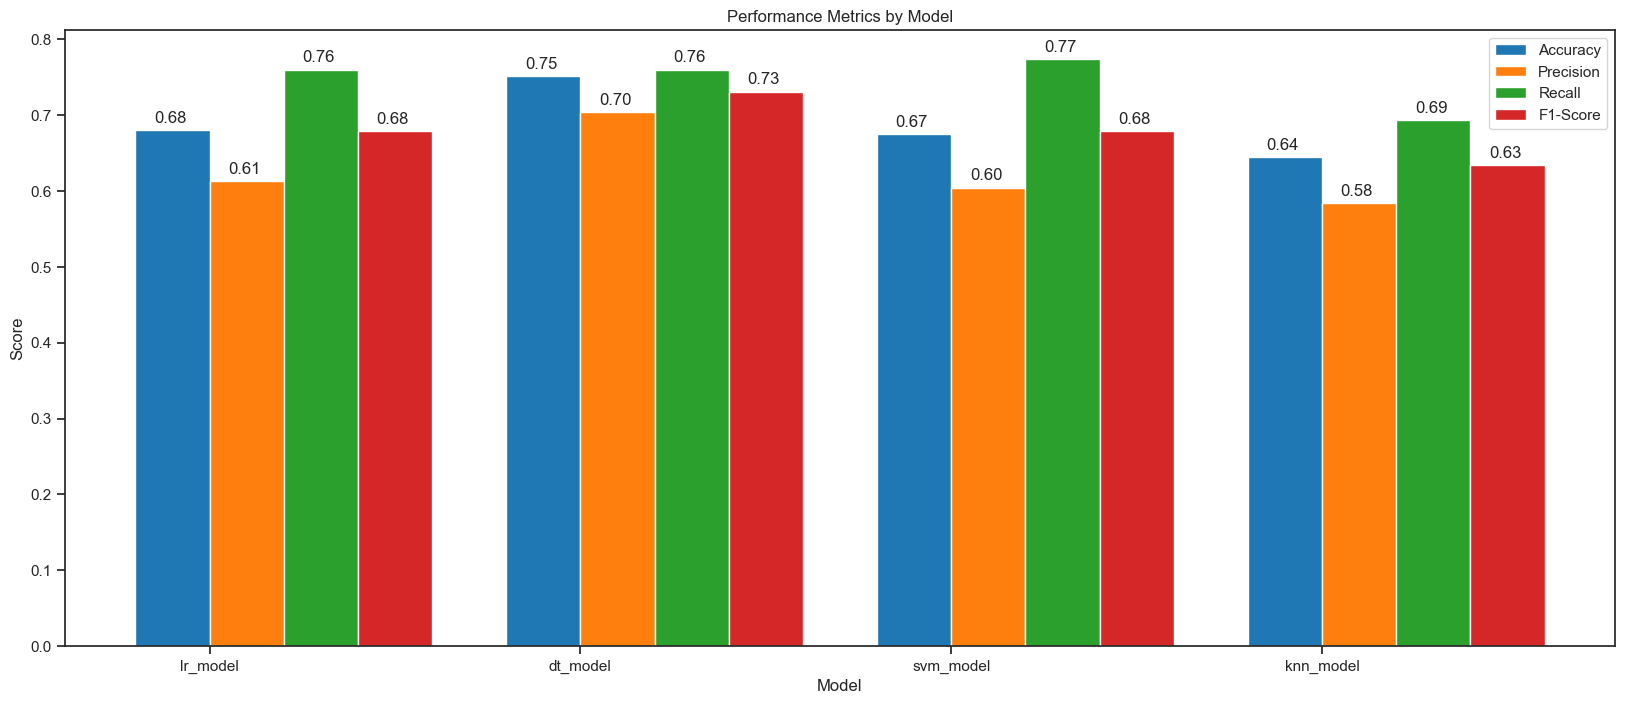

In [69]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


*It is seen that Decision Tree provides the balance measure between correctly identifying loan defaulted case(recall) with a percentage of 77% and minimizing false positive(precision) with a percentage of 72%. It has a higher accuracy of 76% for predicting the loan status.*

## AUC-ROC
The AUC-ROC scores of the models to their accuracy score and confusion matrices can be used to get a complete picture of each model's performance. The AUC-ROC score measures the overall performance of a binary classifier, taking into account bith true positive rate and false positive rate. The higher the AUC-ROC score, the better the model's ability to distinguish between positive and negative classes. Therefore, a model with a higher AUC-ROC score is generally considered to be better than a model with a lower score.

In [70]:
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for decision tree
dt_auc = roc_auc_score(y_test, dt_probs)

# Calculate the AUC-ROC for svc
svm_auc = roc_auc_score(y_test, svm_probs)

# Calculate the AUC-ROC for KNN
knn_auc = roc_auc_score(y_test, knn_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Decision Tree AUC-ROC: {dt_auc:.2f}')
print(f'Support Vector Machine AUC-ROC: {svm_auc:.2f}')
print(f'K-Nearest Neighbor AUC-ROC: {knn_auc:.2f}')

Logistic Regression AUC-ROC: 0.75
Decision Tree AUC-ROC: 0.75
Support Vector Machine AUC-ROC: 0.74
K-Nearest Neighbor AUC-ROC: 0.69


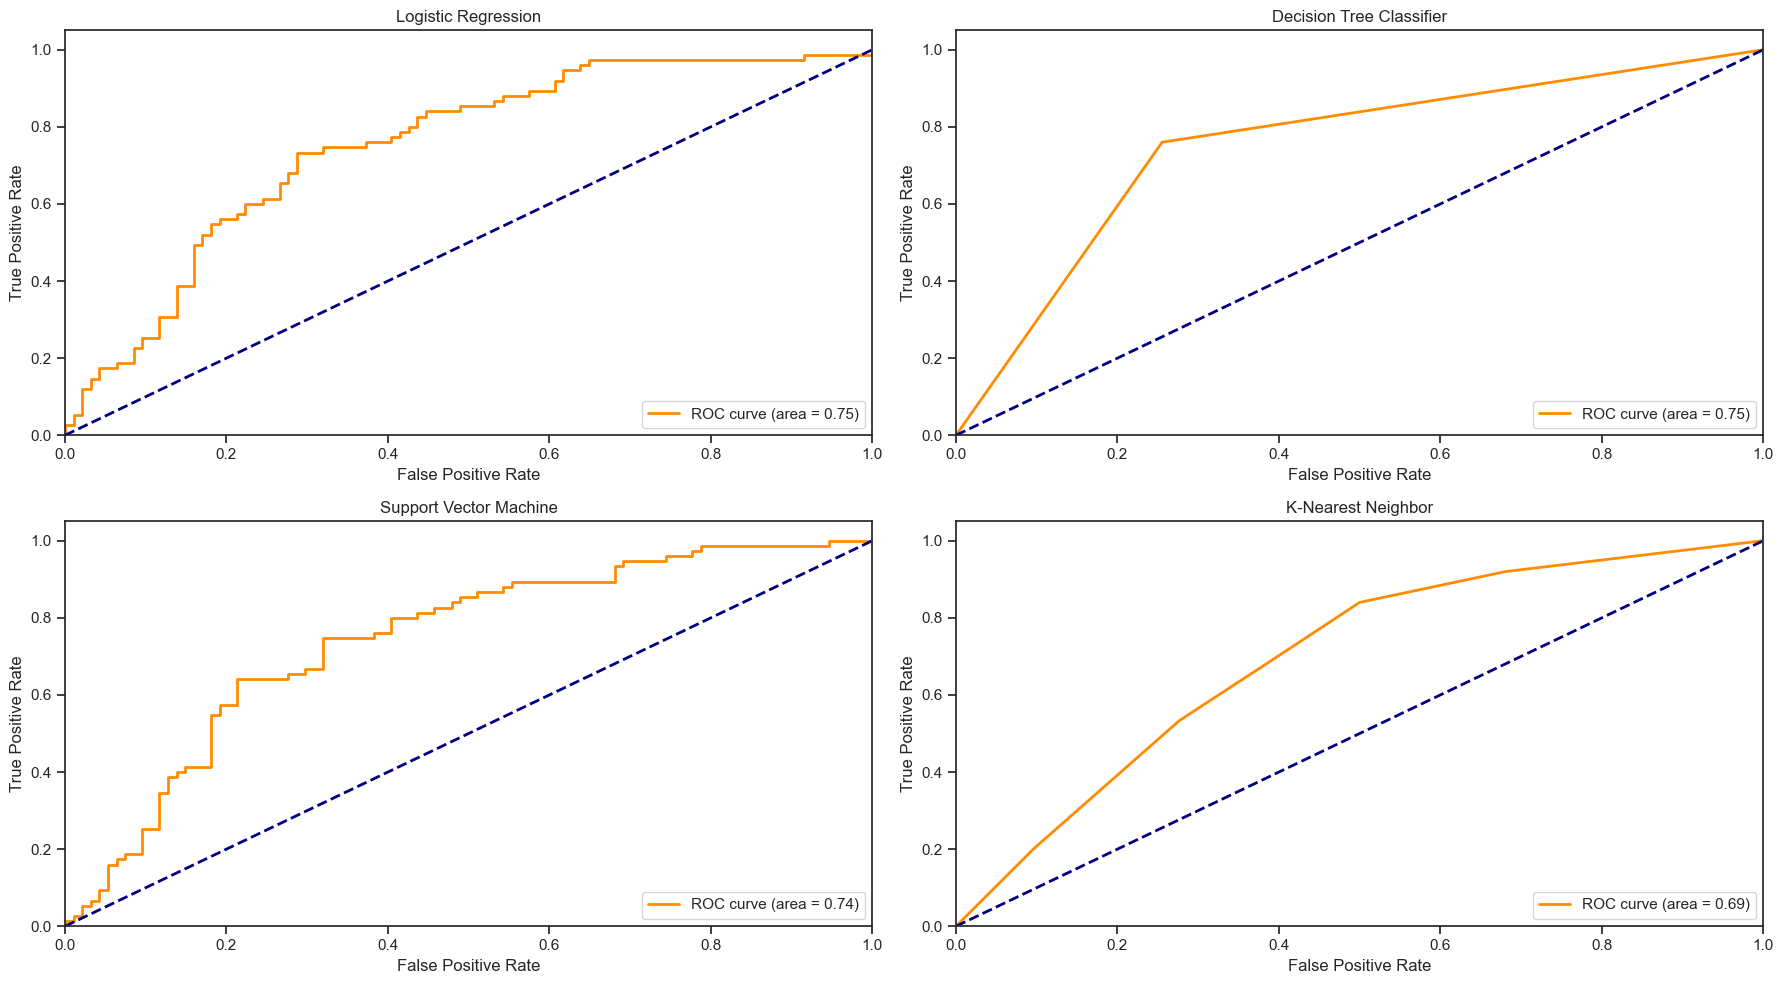

In [71]:
from sklearn.metrics import roc_curve, auc

# Define the models and their names
models = [lr_model, dt_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Support Vector Machine', 'K-Nearest Neighbor']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axes[i].plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(name)
    axes[i].legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()



*It is observed that Logistic Regression and Decision Tree has the highest AUC-ROC score of 0.75, respectively, followed by Support Vector Machine with AUC-ROC score of 0.74 while the KNN has the lowest AUC-ROC score of 0.69.*

## Feature Engineering 
After training the best performing model which is Decision Tree model, We will analyze feature importance.  For example, we will use Random Forest Classifier model to check feature importances as follows:

Random Forest classifier is often used for feature importances because it has several advantages over other model classifiers in this context. Here are a few reasons:

1. **Ensemble Method:** Random Forest is an ensemble method that combines multiple decision trees to make predictions. Each tree in the forest is trained on a subset of the data and a random subset of the features. By combining the results of multiple trees, Random Forest can capture complex relationships between features and the target variable, making it well-suited for assessing feature importances.

2. **Feature Selection:** Random Forest naturally performs feature selection by evaluating the importance of each feature in reducing the impurity or increasing the homogeneity of the target variable across all the trees in the forest. This makes it a good choice for identifying the most important features in a dataset.

3. **Robustness:** Random Forest is known for its robustness to overfitting and noise in the data. This means that the feature importances obtained from a Random Forest model are generally more reliable and less sensitive to outliers or noisy data points.

4. **Handling Correlated Features:** Random Forest can effectively handle correlated features, which is a common scenario in real-world datasets. This makes it a suitable choice for determining feature importances in datasets with multicollinearity.

While Random Forest is commonly used for feature importances, other model classifiers such as Gradient Boosting Machines and XGBoost also provide feature importance scores. However, Random Forest remains popular for this purpose due to its ease of use, robustness, and ability to handle a wide range of data characteristics.

In [72]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

ApplicantIncome: 0.23
LoanAmount: 0.20
Credit_History: 0.15
CoapplicantIncome: 0.12
Property_Area: 0.07
Loan_Amount_Term: 0.07
Dependents: 0.05
Married: 0.05
Gender: 0.03
Education: 0.02
Self_Employed: 0.02


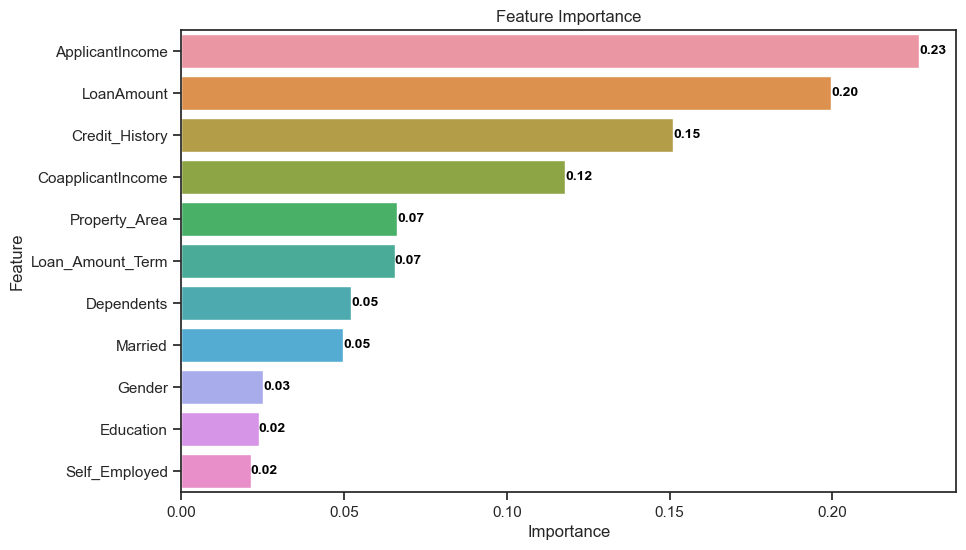

In [73]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

*The feature importances of a loan default prediction using random forest, based on their importance scores from the chart. It shows that Applicant Income, followed by Loan Amount, Credit History, Coapplicant Income, and Loan Amount Term are the major predictors. Property Area, Dependents, Married, Gender, Self Employed, and Education were also important but to a lesser extent.*

## A Bit of Features Selection
We will use the following features; Applicant Income, followed by Loan Amount, Credit History, Coapplicant Income, and Loan Amount Term to retrain the Decision Tree model.

In [74]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_train2 = X_train[['ApplicantIncome', 'LoanAmount', 'Credit_History', 'CoapplicantIncome', 'Loan_Amount_Term']]
X_valid2 = X_valid[['ApplicantIncome', 'LoanAmount', 'Credit_History', 'CoapplicantIncome', 'Loan_Amount_Term']]

In [75]:
# Since Decision Tree model is the best performing model

# fit the model on the new training set
dt_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = dt_model.predict(X_valid2)

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.72


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 0.72
Precision Score: 0.73
Recall Score: 0.74
F1-score: 0.74


### Saving based line model using Pickle
- In python, the pickle module is used for serializing and deserializing objects. Serialization is the process of converting a Python object into a byte stream, and deserilazation is the reverse process of reconstructing the python object from the byte stream

In [78]:
# Saving the model
import pickle
pickle_out = open('Classifier.pkl', mode = 'wb')
pickle.dump(dt_model, pickle_out)
pickle_out.close()

## Model Deployment of the Loan Model using Streamlit
- We will start with basic installations:

In [79]:
!pip install pyngrok
!pip install streamlit
!pip install streamlit_ace

!ngrok --no-warn-script-location

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backen

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --domain baz.ngrok.dev 8080                        # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --domain mydomain.com                           # run ngrok with your own custom domain
  ngrok http 80 --allow-cidr 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions


- We have installed 3 libraries here. Pyngrok is a python wrapper for ngrok which helps to open secure tunnels from public URLs to localhost. This will help us to host our web app. Streamlit will be used to make our web app.

In [88]:
%%writefile app.py

import pickle
import streamlit as st

#loading the trained model
pickle_in = open('Classifier.pkl', 'rb')
classifier = pickle.load(pickle_in)

@st.cache()

# Defining the function which will make prediction using the data which the user input
def prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History):

    # Pre-processing User input
    if Gender == "Male":
        Gender = 0
    else: 
        Gender = 1

    if Married == "Yes":
        Married = 1
    else:
        Married = 0

    LoanAmount = LoanAmount / 1000

    # Convert Credit_History to numerical format
    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1

    # Making Predictions
    prediction = classifier.predict([[Gender, Married, ApplicantIncome, LoanAmount, Credit_History]])

    if prediction == 0:
        pred = "Rejected"
    else:
        pred = "Approved"

    return pred

import pickle
import streamlit as st
# This is the main function in which we define our webpage
def main():
    #Front end element if a web page
    html_temp = '''
    <div style = 'background-color:yellow; padding:13px'>
    <h1 style = 'color: black; text-align: center;'>Streamlit Loan Prediction ML App </h1>
    </div>
    
    '''

    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True)

    #following lines create boxes in which user can enter data required to make prediction
    Gender = st.selectbox('Gender', ("Male", "Female"))
    Married = st.selectbox('Married', ("Yes", "No"))
    ApplicantIncome = st.number_input("Applicants Monthly income")
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History', ("Unclear Debts", "No unclear Debts"))
    result = ""

    #When 'Predict is clicked , make prediction and store it
    if st.button("Predict"):
        result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History)
        st.success("Your Loan is {}".format(result))
        print(LoanAmount)

if __name__ == '__main__':
    main()

Overwriting app.py


In [96]:
import pickle
import streamlit as st
# This is the main function in which we define our webpage
def main():
    #Front end element if a web page
    html_temp = '''
    <div style = 'background-color:yellow; padding:13px'>
    <h1 style = 'color: black; text-align: center;'>Streamlit Loan Prediction ML App </h1>
    </div>
    
    '''

    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True)

    #following lines create boxes in which user can enter data required to make prediction
    Gender = st.selectbox('Gender', ("Male", "Female"))
    Married = st.selectbox('Married', ("Yes", "No"))
    ApplicantIncome = st.number_input("Applicants Monthly income")
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History', ("Unclear Debts", "No unclear Debts"))
    result = ""

    #When 'Predict is clicked , make prediction and store it
    if st.button("Predict"):
        result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History)
        st.success("Your Loan is {}".format(result))
        print(LoanAmount)

if __name__ == '__main__':
    main()

In [97]:
from pyngrok import ngrok

#set your ngrok authentication token
ngrok.set_auth_token("2dDbVL9JNQV4RSE9PGAeIIXR563_5cJigq5LfJsm4QxbP7i4W")

#connect to ngrok with authentication
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://15a6-105-113-94-55.ngrok-free.app" -> "http://localhost:8501">